In [10]:
import numpy as np
import matplotlib.pyplot as plt
from CompilerQC import Polygons, Graph, Energy
from CompilerQC.parameter_estimation import fit_polynom_to_LHZ as fit

Die Energie der Plaquetten und Nichtplaquetten scalen mit unterschiedlichen Ordnungen.
Die Nichtplaquetten beinhalten zwar die Plaquetten, da deren Energie hier jedoch 0 ist, werden sie nicht dazugezählt.

In [2]:
Ns = np.array([i for i in range(4,20)])

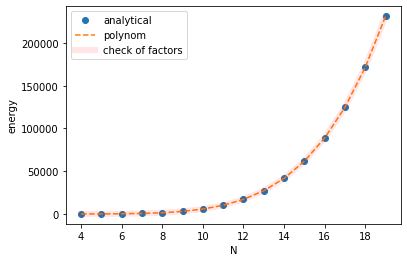

In [22]:
energy_LHZ4 = [fit.total_energy_LHZ4(n) for n in Ns]
plt.plot(
    Ns,
    energy_LHZ4,
    '.',
    label='analytical',
    ms=12
)
plt.plot(
    Ns,
    fit.fit_polynom_to_LHZ4(Ns),
    '--',
    label='polynom'
)

plt.plot(
    Ns,
    (fit.scale_4plaqs(Ns)
    * list(map(fit.number_4plaqs, Ns))),
    'r',
    label='check of factors',
    lw=6,
    alpha=0.1
)
plt.xlabel('N')
plt.ylabel('energy')
plt.legend()
plt.savefig('Plots/fit_fot_LHZ4.png')

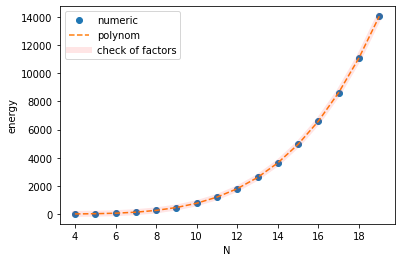

In [23]:
energy_LHZ3 = [fit.total_energy_LHZ3(n) for n in Ns]
plt.plot(
    Ns,
    energy_LHZ3,
    '.',
    label='numeric',
    ms=12
)
plt.plot(
    Ns,
    fit.fit_polynom_to_LHZ3(Ns),
    '--',
    label='polynom'
)

plt.plot(
    Ns,
    (fit.scale_3plaqs(Ns)
    * list(map(fit.number_3plaqs, Ns))),
    'r',
    label='check of factors',
    lw=6,
    alpha=0.1
)
plt.xlabel('N')
plt.ylabel('energy')
plt.legend()
plt.savefig('Plots/fit_fot_LHZ3.png')

In [14]:
energy_LHZ = []
for N in range(4, 20):
    polygon_object = Polygons(Graph.fully(N))
    lhz_coords = qbits = polygon_object.qbits 
    polygon_object.update_qbits_coords(qbits, lhz_coords)
    energy_LHZ.append(Energy(polygon_object)(polygon_object))

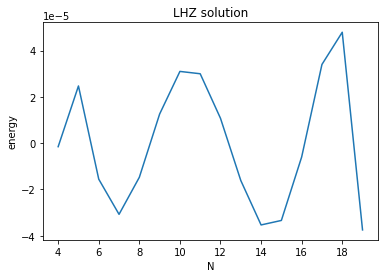

In [24]:
plt.plot(range(4, 20), energy_LHZ)
plt.xlabel('N')
plt.ylabel('energy')
plt.title('LHZ solution')
plt.savefig('Plots/energy_for_LHZ.png')